In [1]:
import pandas as pd
import os
import PIL
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras import layers,Model
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet101

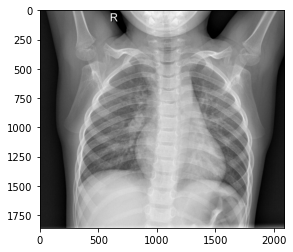

In [2]:

img=cv2.imread('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(img)
plt.show()

In [3]:
DATA=Path("../input/chest-xray-pneumonia/chest_xray")
train_path=DATA/'train'
val_path=DATA/'val'
test_path=DATA/'test'

In [4]:
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                           shear_range=0.2,
                                                           zoom_range=0.2,
                                                           horizontal_flip=True)




train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=256,
                                            class_mode='sparse',
                                            shuffle=True)

Found 5216 images belonging to 2 classes.


In [5]:
val_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         shear_range=0.2,
                                                         zoom_range=0.2,
                                                         horizontal_flip=True)
                                                           



val_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(224,224),
                                            batch_size=256,
                                            class_mode='sparse',
                                            shuffle=True)

Found 5216 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

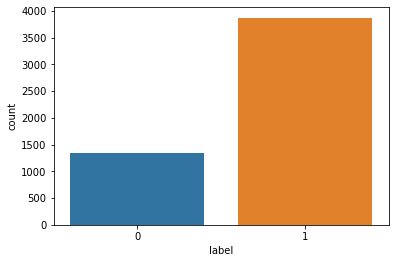

In [6]:
normal_train = train_path / 'NORMAL'
pneumonia_train = train_path / 'PNEUMONIA'

import glob

normal=normal_train.glob("*.jpeg")
pneumonia=pneumonia_train.glob("*.jpeg")

train=[]

for img in normal:
    train.append((img,0))

for img in pneumonia:
    train.append((img,1))    

    
train_df=pd.DataFrame(train,columns=['image','label'],index=None) 

import seaborn as sns
sns.countplot(train_df['label'])

In [7]:
model=Sequential([])
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train_set,validation_data=val_set,epochs=5)

Epoch 1/5
21/21 [==============================] - 275s 13s/step - loss: 0.8141 - accuracy: 0.6472 - val_loss: 0.4360 - val_accuracy: 0.7669
Epoch 2/5
21/21 [==============================] - 222s 11s/step - loss: 0.3594 - accuracy: 0.8397 - val_loss: 0.2842 - val_accuracy: 0.8898
Epoch 3/5
21/21 [==============================] - 221s 11s/step - loss: 0.2740 - accuracy: 0.8919 - val_loss: 0.2103 - val_accuracy: 0.9143
Epoch 4/5
21/21 [==============================] - 224s 11s/step - loss: 0.2180 - accuracy: 0.9060 - val_loss: 0.2243 - val_accuracy: 0.9047
Epoch 5/5
21/21 [==============================] - 224s 11s/step - loss: 0.2086 - accuracy: 0.9172 - val_loss: 0.1873 - val_accuracy: 0.9296


In [11]:
test_gen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_set=test_gen.flow_from_directory(test_path,
                                       target_size=(224,224),
                                       batch_size=256,
                                       class_mode='binary',
                                       shuffle=True)

Found 624 images belonging to 2 classes.


In [12]:
test_acc=model.evaluate(test_set)

3/3 [==============================] - 9s 3s/step - loss: 0.3472 - accuracy: 0.8462


In [13]:
print("test accuracy : ",test_acc[1])

test accuracy :  0.8461538553237915


In [14]:
label={0:"NORMAL",
       1:"PNEUMONIA"}
label

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [15]:
import numpy as np
def prediction(path):
    img=keras.preprocessing.image.load_img(path,target_size=(224,224))
    img=keras.preprocessing.image.img_to_array(img)
    img=img/255.0
    img=np.array([img])
    pred=label[np.argmax(model.predict(img))]
    plt.imshow(img.reshape(224,224,3))
    plt.title(pred)
                

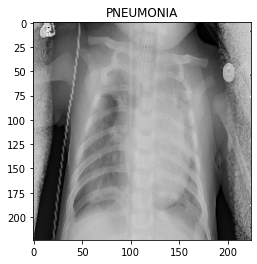

In [16]:
prediction("../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg")

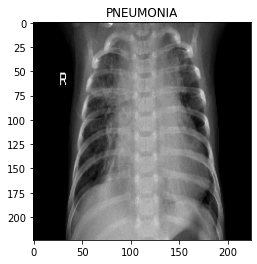

In [17]:
prediction('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0009-0001.jpeg')